<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#packages" data-toc-modified-id="packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>packages</a></span></li><li><span><a href="#true-model" data-toc-modified-id="true-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>true model</a></span></li><li><span><a href="#data" data-toc-modified-id="data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>plot</a></span></li><li><span><a href="#models" data-toc-modified-id="models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>models</a></span><ul class="toc-item"><li><span><a href="#Linear-summary" data-toc-modified-id="Linear-summary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear summary</a></span><ul class="toc-item"><li><span><a href="#Influential-values" data-toc-modified-id="Influential-values-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Influential values</a></span></li><li><span><a href="#Cook's-d-plot" data-toc-modified-id="Cook's-d-plot-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Cook's d plot</a></span></li><li><span><a href="#Predicted-values" data-toc-modified-id="Predicted-values-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Predicted values</a></span></li></ul></li><li><span><a href="#Logistic-summary" data-toc-modified-id="Logistic-summary-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Logistic summary</a></span><ul class="toc-item"><li><span><a href="#Influential-values" data-toc-modified-id="Influential-values-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Influential values</a></span></li><li><span><a href="#Cooks's-d-plot" data-toc-modified-id="Cooks's-d-plot-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Cooks's d plot</a></span></li><li><span><a href="#Predicted-values" data-toc-modified-id="Predicted-values-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Predicted values</a></span></li></ul></li><li><span><a href="#Raw-proportions-and-cell-sizes" data-toc-modified-id="Raw-proportions-and-cell-sizes-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Raw proportions and cell sizes</a></span></li><li><span><a href="#Logit-comparisons" data-toc-modified-id="Logit-comparisons-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Logit comparisons</a></span></li></ul></li><li><span><a href="#severity-effect" data-toc-modified-id="severity-effect-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>severity effect</a></span></li><li><span><a href="#treatment-effect" data-toc-modified-id="treatment-effect-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>treatment effect</a></span></li><li><span><a href="#interaction-effect" data-toc-modified-id="interaction-effect-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>interaction effect</a></span></li><li><span><a href="#real-data-example" data-toc-modified-id="real-data-example-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>real data example</a></span></li><li><span><a href="#mixed-effects-logistic-regression" data-toc-modified-id="mixed-effects-logistic-regression-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>mixed effects logistic regression</a></span></li></ul></div>

# packages

In [328]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# seaborn theme
sns.set(palette = "colorblind", font_scale = 1.5)

# true model

In [329]:
b0, b1, b2, b3 = 0.0, 0.5, 0.0, 1.0

# data

In [330]:
# 4 groups, unequal sample sizes
group = np.repeat(["minor - no treatment", "minor - treatment", "severe - no treatment", "severe - treatment"], repeats = [20, 60, 50, 70])

# severity labels
severity = np.asarray([{"minor - no treatment": "minor", "minor - treatment": "minor", "severe - no treatment": "severe", "severe - treatment": "severe"}[x] for x in group])

# severity effect
severity_effect = np.asarray([{"minor - no treatment": -0.5, "minor - treatment": -0.5, "severe - no treatment": 0.5, "severe - treatment": 0.5}[x] for x in group])

# treatment labels
treatment = np.asarray([{"minor - no treatment": "no treatment", "minor - treatment": "treatment", "severe - no treatment": "no treatment", "severe - treatment": "treatment"}[x] for x in group])

# treatment effect
treatment_effect = np.asarray([{"minor - no treatment": -0.5, "minor - treatment": 0.5, "severe - no treatment": -0.5, "severe - treatment": 0.5}[x] for x in group])

# interaction effect
interaction_effect = np.asarray([{"minor - no treatment": 0.5, "minor - treatment": -0.5, "severe - no treatment": -0.5, "severe - treatment": 0.5}[x] for x in group])

# response variable
y = np.random.binomial(n = 1, p = stats.logistic.cdf(b0 + b1 * severity_effect + b2 * treatment_effect + b3 * interaction_effect), size = np.sum([20, 60, 50, 70]))

# store in data frame
data_frame = pd.DataFrame({"y": y, "group": group, "severity": severity, "severity_effect": severity_effect, "treatment": treatment, "treatment_effect": treatment_effect, "interaction_effect": interaction_effect})

# see it
data_frame

,y,group,severity,severity_effect,treatment,treatment_effect,interaction_effect
0,0,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
1,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
2,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
3,1,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
4,0,minor - no treatment,minor,-0.5,no treatment,-0.5,0.5
...,...,...,...,...,...,...,...
195,1,severe - treatment,severe,0.5,treatment,0.5,0.5
196,0,severe - treatment,severe,0.5,treatment,0.5,0.5
197,0,severe - treatment,severe,0.5,treatment,0.5,0.5
198,0,severe - treatment,severe,0.5,treatment,0.5,0.5


# plot

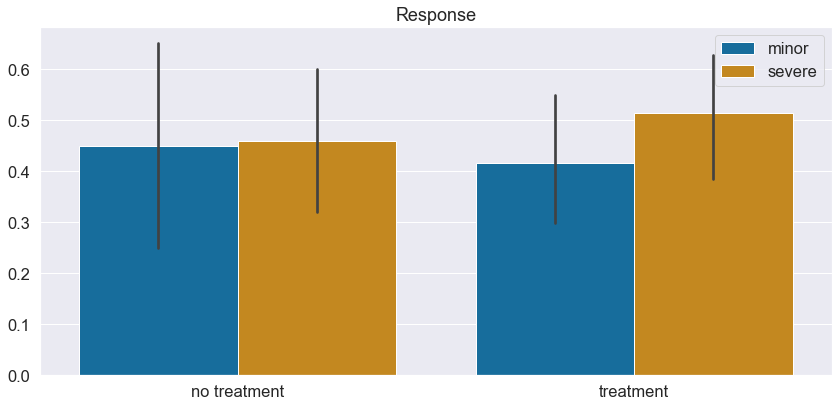

In [331]:
# figure size
plt.figure(figsize = (12, 6))

# barplot
sns.barplot(x = "treatment", y = "y", hue = "severity", data = data_frame)

# titles
plt.title("Response")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

# models

In [332]:
# linear regression
linear_fit1 = smf.ols("y ~ severity_effect + treatment_effect + interaction_effect", data = data_frame).fit()

# logistic regression
logistic_fit1 = smf.glm("y ~ severity_effect + treatment_effect + interaction_effect", data = data_frame, family = sm.families.family.Binomial()).fit()

## Linear summary

In [333]:
linear_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4175
Date:                Sun, 16 Aug 2020   Prob (F-statistic):              0.741
Time:                        09:33:42   Log-Likelihood:                -144.03
No. Observations:                 200   AIC:                             296.1
Df Residuals:                     196   BIC:                             309.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4602      0.040     11.537      0.000       0.382       0.539
severity_effect        0.0538      0.080      0.674      0.501      -0.104       0.211
treatment_effect       0.0105      0.080      0.131      0.896      -0.147       0.168
interaction_effect     0.0438      0.080      0.549      0.584      -0.114       0.201
==============================================================================
Omnibus:                     1118.202   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.495
Skew:                           0.139   Prob(JB):                     8.78e-08
Kurtosis:                       1.045   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Influential values

In [334]:
linear_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)

,dfb_Intercept,dfb_severity_effect,dfb_treatment_effect,dfb_interaction_effect,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15,0.181525,-0.181525,-0.181525,0.181525,0.016610,1.123554,0.050000,0.257761,1.124310,0.257935
6,0.181525,-0.181525,-0.181525,0.181525,0.016610,1.123554,0.050000,0.257761,1.124310,0.257935
7,0.181525,-0.181525,-0.181525,0.181525,0.016610,1.123554,0.050000,0.257761,1.124310,0.257935
17,0.181525,-0.181525,-0.181525,0.181525,0.016610,1.123554,0.050000,0.257761,1.124310,0.257935
11,0.181525,-0.181525,-0.181525,0.181525,0.016610,1.123554,0.050000,0.257761,1.124310,0.257935
...,...,...,...,...,...,...,...,...,...,...
53,-0.044222,0.044222,-0.044222,0.044222,0.002966,-0.836626,0.016667,-0.108919,-0.835983,-0.108836
22,-0.044222,0.044222,-0.044222,0.044222,0.002966,-0.836626,0.016667,-0.108919,-0.835983,-0.108836
56,-0.044222,0.044222,-0.044222,0.044222,0.002966,-0.836626,0.016667,-0.108919,-0.835983,-0.108836
57,-0.044222,0.044222,-0.044222,0.044222,0.002966,-0.836626,0.016667,-0.108919,-0.835983,-0.108836


### Cook's d plot

No handles with labels found to put in legend.


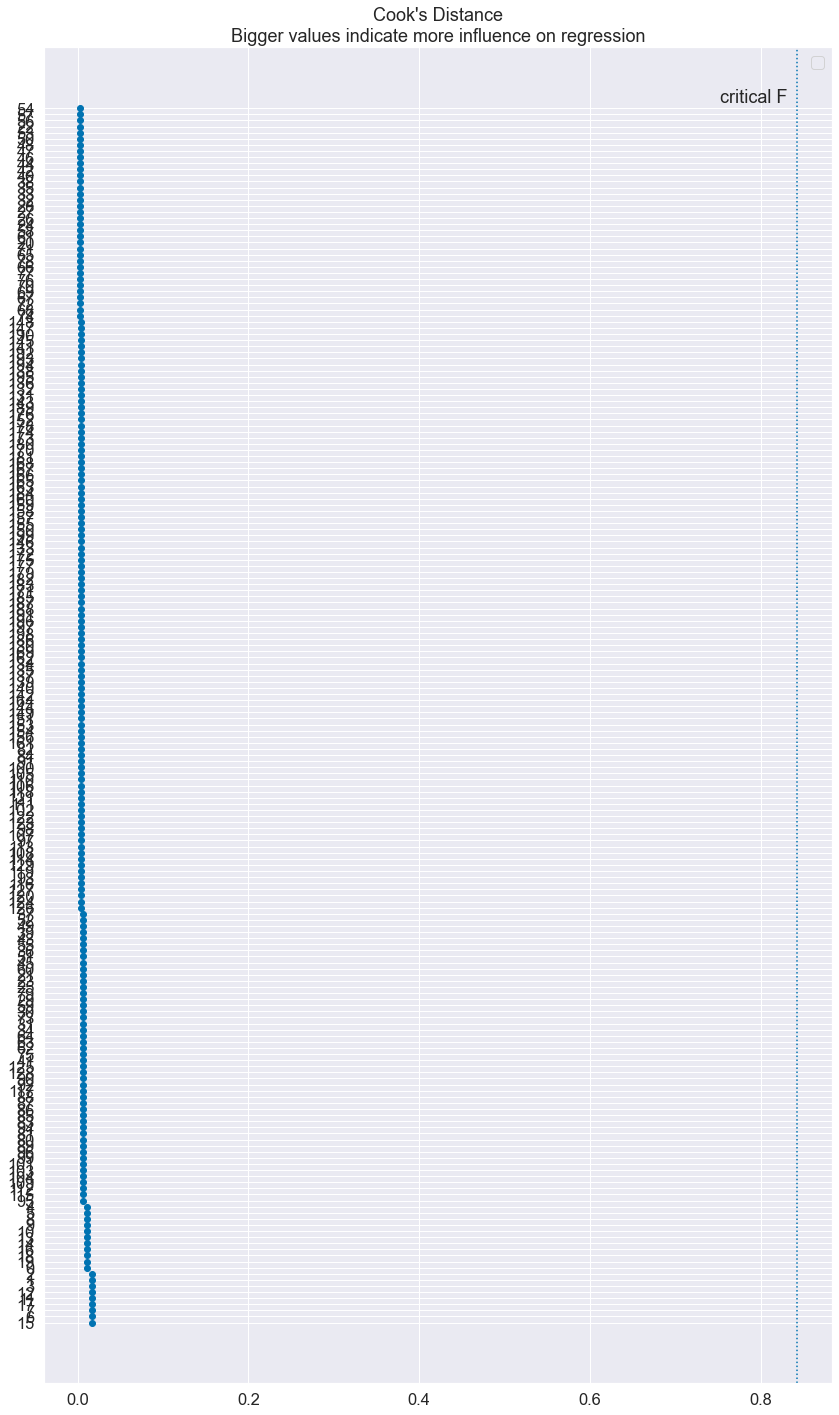

In [335]:
# figure size
plt.figure(figsize = (12, 20))

# cutoff line
plt.axvline(x = stats.f.ppf(q = 0.50, dfn = len(linear_fit1.params), dfd = linear_fit1.df_resid), linestyle = "dotted")
plt.annotate("critical F", xy = (stats.f.ppf(q = 0.50, dfn = len(linear_fit1.params) - 1.5, dfd = linear_fit1.df_resid), np.sum([20.0, 60.0, 50.0, 70.0])))

# lineplot
plt.scatter(linear_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)["cooks_d"], linear_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False).index.map(str))

# titles
plt.title("Cook's Distance\nBigger values indicate more influence on regression")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

### Predicted values

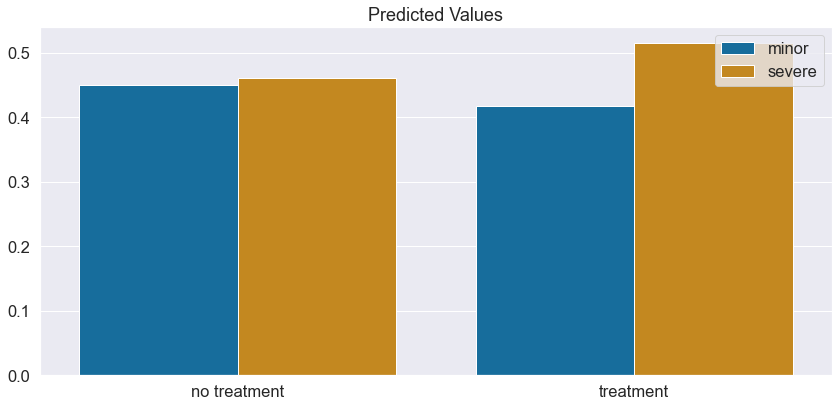

In [336]:
# figure size
plt.figure(figsize = (12, 6))

# barplot
sns.barplot(x = "treatment", y = linear_fit1.fittedvalues, hue = "severity", data = data_frame)

# titles
plt.title("Predicted Values")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

## Logistic summary

In [337]:
logistic_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.50
Date:                Sun, 16 Aug 2020   Deviance:                       275.01
Time:                        09:33:45   Pearson chi2:                     200.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1601      0.160     -1.002      0.316      -0.473       0.153
severity_effect        0.2170      0.319      0.679      0.497      -0.409       0.843
treatment_effect       0.0408      0.319      0.128      0.898      -0.585       0.667
interaction_effect     0.1767      0.319      0.553      0.580      -0.450       0.803
======================================================================================
"""

### Influential values

In [338]:
logistic_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)

,dfb_Intercept,dfb_severity_effect,dfb_treatment_effect,dfb_interaction_effect,cooks_d,standard_resid,hat_diag,dffits_internal
2,0.183040,-0.183040,-0.183040,0.183040,0.016928,1.134262,0.050000,0.260217
3,0.183040,-0.183040,-0.183040,0.183040,0.016928,1.134262,0.050000,0.260217
12,0.183040,-0.183040,-0.183040,0.183040,0.016928,1.134262,0.050000,0.260217
17,0.183040,-0.183040,-0.183040,0.183040,0.016928,1.134262,0.050000,0.260217
6,0.183040,-0.183040,-0.183040,0.183040,0.016928,1.134262,0.050000,0.260217
...,...,...,...,...,...,...,...,...
53,-0.045472,0.045472,-0.045472,0.045472,0.003078,-0.852286,0.016667,-0.110958
22,-0.045472,0.045472,-0.045472,0.045472,0.003078,-0.852286,0.016667,-0.110958
56,-0.045472,0.045472,-0.045472,0.045472,0.003078,-0.852286,0.016667,-0.110958
57,-0.045472,0.045472,-0.045472,0.045472,0.003078,-0.852286,0.016667,-0.110958


### Cooks's d plot

No handles with labels found to put in legend.


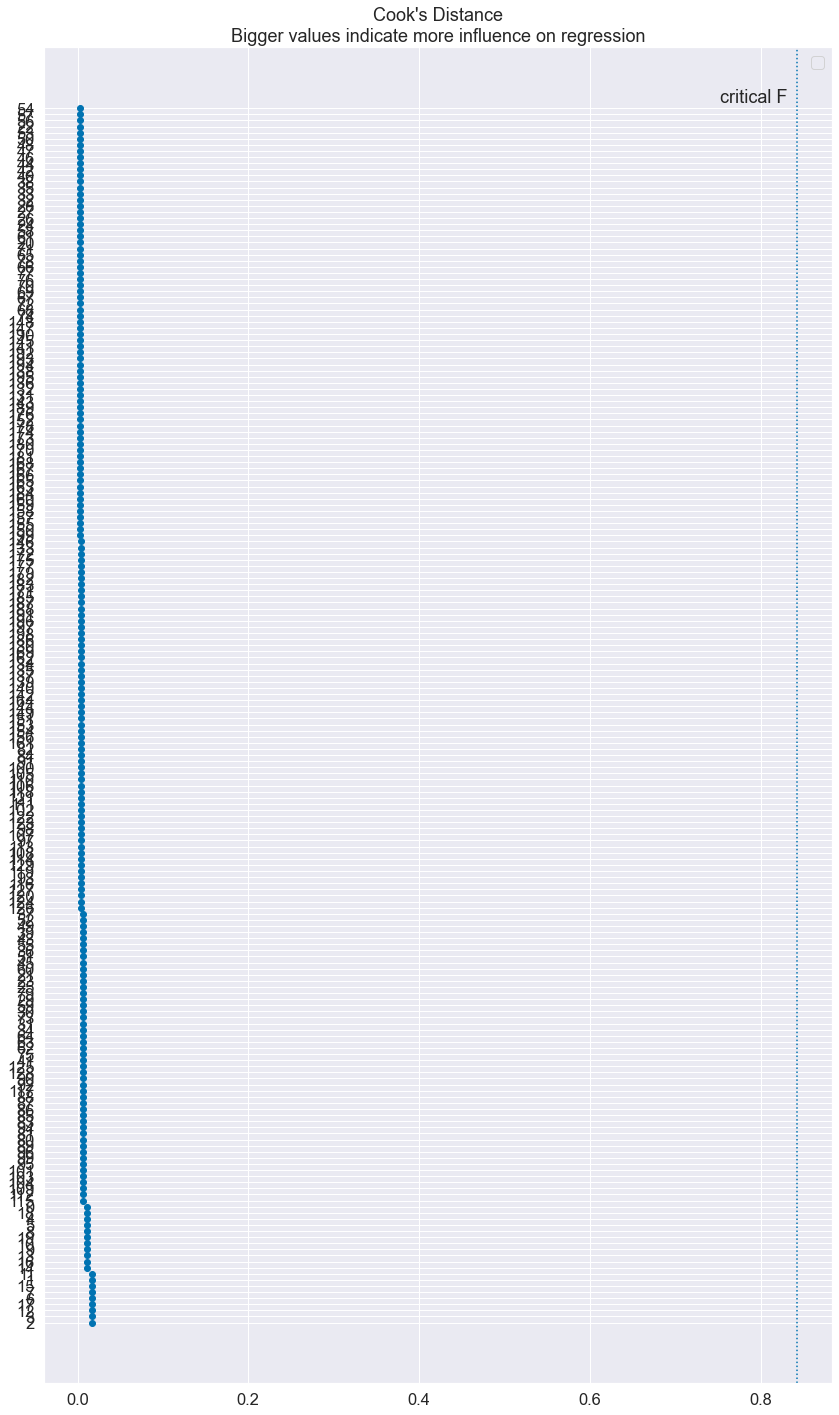

In [339]:
# figure size
plt.figure(figsize = (12, 20))

# cutoff line
# 
plt.axvline(x = stats.f.ppf(q = 0.50, dfn = len(logistic_fit1.params), dfd = linear_fit1.df_resid), linestyle = "dotted")
plt.annotate("critical F", xy = (stats.f.ppf(q = 0.50, dfn = len(logistic_fit1.params) - 1.5, dfd = linear_fit1.df_resid), np.sum([20.0, 60.0, 50.0, 70.0])))

# lineplot
plt.scatter(logistic_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False)["cooks_d"], logistic_fit1.get_influence().summary_frame().sort_values("cooks_d", ascending = False).index.map(str))

# titles
plt.title("Cook's Distance\nBigger values indicate more influence on regression")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

### Predicted values

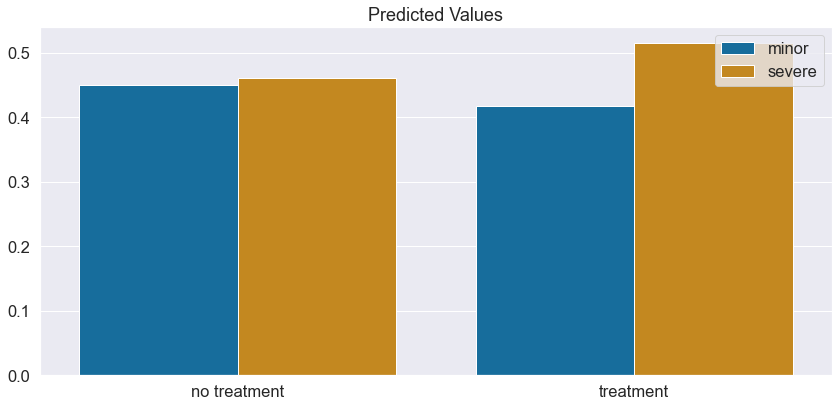

In [340]:
# figure size
plt.figure(figsize = (12, 6))

# barplot
sns.barplot(x = "treatment", y = logistic_fit1.fittedvalues, hue = "severity", data = data_frame)

# titles
plt.title("Predicted Values")
plt.xlabel(None)
plt.ylabel(None)

# legend
plt.legend(loc = "best")

# tighten plot
plt.tight_layout()

## Raw proportions and cell sizes

In [341]:
proportion_n_df = (data_frame.groupby(["severity", "treatment"])["y"]
                   .agg(["mean", lambda x: np.sum(~np.isnan(x))])
                   .rename(columns = {"<lambda_0>": "n", "mean": "p_hat"})
                   .reset_index()
                   .assign(severity_effect = lambda x: x["severity"].replace({"minor": -0.5, "severe": 0.5}),
                           treatment_effect = lambda x: x["treatment"].replace({"no treatment": -0.5, "treatment": 0.5}),
                           interaction_effect = [0.5, -0.5, -0.5, 0.5]))

# see it
proportion_n_df

,severity,treatment,p_hat,n,severity_effect,treatment_effect,interaction_effect
0,minor,no treatment,0.450000,20,-0.5,-0.5,0.5
1,minor,treatment,0.416667,60,-0.5,0.5,-0.5
2,severe,no treatment,0.460000,50,0.5,-0.5,-0.5
3,severe,treatment,0.514286,70,0.5,0.5,0.5


## Logit comparisons

In [342]:
def logit_test(p_hat, n, contrast, alpha = 0.05):
    """
    p_hat: vector of proportion estimates
    n: cell sizes for proportions
    contrast: contrast/comparison weights
    alpha: false positive error rate
    
    example:
    logit_test(p_hat = [0.60, 0.55, 0.55, 0.60], n = [102, 97, 100, 101], contrast = [1, -1, -1, 1], alpha = 0.05)
    
    """
    # logits
    logits = stats.logistic.ppf(np.asarray(p_hat))
    
    # variances for logits
    logit_var = 1 / (np.asarray(n) * np.asarray(p_hat) * (1 - np.asarray(p_hat)))
    
    # contrast estimate
    logit_contrast_hat = np.dot(logits, contrast)
    
    # standard error for the contrast
    logit_contrast_se = np.sqrt(np.sum(np.asarray(contrast) ** 2 * logit_var))
    
    # z-test
    z_stat = logit_contrast_hat / logit_contrast_se
    
    # p-value
    p_value_2tail = 2 * stats.norm.cdf(-np.abs(z_stat))
    
    # confidence intervals
    logit_contrast_lwr = logit_contrast_hat - stats.norm.ppf(1 - alpha / 2) * logit_contrast_se
    logit_contrast_upr = logit_contrast_hat + stats.norm.ppf(1 - alpha / 2) * logit_contrast_se
    
    return {"estimate": logit_contrast_hat, "se": logit_contrast_se, "z": z_stat, "p": p_value_2tail, "lower": logit_contrast_lwr, "upper": logit_contrast_upr}

# example
logit_test(p_hat = [0.60, 0.55, 0.55, 0.60], n = [102, 97, 100, 101], contrast = [1, -1, -1, 1], alpha = 0.05)

{'estimate': 0.4095888252920256,
 'se': 0.4051684698002408,
 'z': 1.0109099197525517,
 'p': 0.3120595458107882,
 'lower': -0.38452678318765093,
 'upper': 1.2037044337717022}

# severity effect

In [343]:
logit_test(p_hat = proportion_n_df["p_hat"], n = proportion_n_df["n"], contrast = [-0.5, -0.5, 0.5, 0.5], alpha = 0.05)

{'estimate': 0.21697934792406648,
 'se': 0.31949040321341926,
 'z': 0.6791419890603866,
 'p': 0.4970478997154868,
 'lower': -0.4092103357804152,
 'upper': 0.8431690316285482}

# treatment effect

In [344]:
logit_test(p_hat = proportion_n_df["p_hat"], n = proportion_n_df["n"], contrast = [-0.5, 0.5, -0.5, 0.5], alpha = 0.05)

{'estimate': 0.040849761378033145,
 'se': 0.31949040321341926,
 'z': 0.12785911866888078,
 'p': 0.8982604640082704,
 'lower': -0.5853399223264486,
 'upper': 0.6670394450825148}

# interaction effect

In [345]:
logit_test(p_hat = proportion_n_df["p_hat"], n = proportion_n_df["n"], contrast = [0.5, -0.5, -0.5, 0.5], alpha = 0.05)

{'estimate': 0.17665130253709463,
 'se': 0.31949040321341926,
 'z': 0.5529158333406707,
 'p': 0.5803210449530263,
 'lower': -0.4495383811673871,
 'upper': 0.8028409862415763}

# real data example
In this example, we are going to explore Example 2 about lung cancer using a simulated dataset, which we have posted online. A variety of outcomes were collected on patients, who are nested within doctors, who are in turn nested within hospitals. There are also a few doctor level variables, such as Experience that we will use in our example.  
Source: [MIXED EFFECTS LOGISTIC REGRESSION | STATA DATA ANALYSIS EXAMPLES](https://stats.idre.ucla.edu/stata/dae/mixed-effects-logistic-regression/)

In [348]:
hdp = pd.read_csv("https://stats.idre.ucla.edu/stat/data/hdp.csv")

# see it
hdp.head(n = 10)

,tumorsize,co2,pain,wound,mobility,ntumors,nmorphine,remission,lungcapacity,Age,Married,FamilyHx,SmokingHx,Sex,CancerStage,LengthofStay,WBC,RBC,BMI,IL6,CRP,DID,Experience,School,Lawsuits,HID,Medicaid
0,67.981196,1.534333,4,4,2,0,0,0,0.801088,64.968239,0,no,former,male,II,6,6087.648615,4.868416,24.144237,3.698981,8.086417,1,25,average,3,1,0.605867
1,64.702458,1.676132,2,3,2,0,0,0,0.326444,53.917136,0,no,former,female,II,6,6700.310486,4.679052,29.405162,2.627481,0.803488,1,25,average,3,1,0.605867
2,51.567001,1.533445,6,3,2,0,0,0,0.565031,53.347302,1,no,never,female,II,5,6042.809114,5.005862,29.482586,13.896153,4.034157,1,25,average,3,1,0.605867
3,86.437990,1.453300,3,3,2,0,0,0,0.848411,41.368043,0,no,former,male,I,5,7162.696543,5.265058,21.557259,3.008033,2.125863,1,25,average,3,1,0.605867
4,53.400177,1.566348,3,4,2,0,0,0,0.886491,46.800422,0,no,never,male,II,6,6443.440465,4.984259,29.815188,3.890698,1.349324,1,25,average,3,1,0.605867
5,51.657268,1.417868,4,5,2,0,0,0,0.701031,51.929362,1,no,never,male,I,5,6800.549197,5.199714,27.102525,1.418219,2.194694,1,25,average,3,1,0.605867
6,78.917073,1.706632,3,4,2,0,0,0,0.890854,53.829262,1,no,current,female,II,4,6236.449533,4.869905,21.119066,2.293220,8.607956,1,25,average,3,1,0.605867
7,69.833248,1.528726,3,3,3,0,0,0,0.660880,46.562229,0,no,former,male,II,5,3997.702240,4.647919,42.475446,4.575620,0.838388,1,25,average,3,1,0.605867
8,62.852592,1.542961,4,4,3,2,0,0,0.908871,54.389361,1,yes,former,male,II,6,6652.796339,4.827062,18.685054,8.030203,7.226128,1,25,average,3,1,0.605867
9,71.777903,1.593065,5,4,3,0,0,0,0.959327,50.544648,0,no,never,male,II,7,5778.092393,4.850514,39.442441,5.855664,4.088785,1,25,average,3,1,0.605867
